<a href="https://colab.research.google.com/github/larissafeitosa24/Projetos-MVP-Puc-Rio/blob/main/v2_MVP1_Projeto_Seguradoras_Digitais_x_Tradicionais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dados extraídos da base de dados da X Seguros( o nome não será divulgado devido à pedidos de confidencialidade da empresa), relativos aos clientes que entraram no escopo de 2021 a 2023, foi escolhido um escopo curto devido a volumetria grande de dados, foram escolhidos apenas dados não sensíveis dos clientes para cumprimento das normas da LGPD para não vazamento e utilização dos dados de forma indevida( os nomes também foram modificados)
O objetivo é evidenciar a tendencia de um mercado promissor dos jovens aderirem seguros, devido ao uso da seguradora digital e a facilidade de aderir esses seguros, como utulização de cartão de crédito e uso de aplicativo. 
Além de poder ser usado como um bom direcionar na área de vendas/marketing para estrategia de produtos direcionados de acordo com o nicho que se deseja alcançar.


Projeto - Seguradoras Digitais x Tradicionais 

In [ ]:
#importar a base de clientes da seguradora tradicional e da digital com clientes com data de entrada no periodo de 01/05/2021 a 01/05/2023


In [ ]:
# importação dos pacotes que serão usados  

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import missingno as ms 



In [ ]:
# caminho e nome onde está a base que está a relação dos clientes das seguradoras : tradicional e digital
url_dados = 'https://raw.githubusercontent.com/larissafeitosa24/Projetos-MVP-Puc-Rio/main/TRADICIONAL.del'

In [ ]:
# caminho e nome onde está a base que está a relação dos clientes das seguradoras : tradicional e digital
url_dados2 = 'https://raw.githubusercontent.com/larissafeitosa24/Projetos-MVP-Puc-Rio/main/DIGITAL.del'

In [ ]:
# importa o arquivo que tem as informações da seguradora tradicional
df_trad = pd.read_csv(url_dados,sep = ";")

In [ ]:
# importa o arquivo que tem as infromações da seguradora digital
df_dig = pd.read_csv(url_dados2, sep = ";")

In [ ]:
# lista os dados referentes à base da seguradora tradicional que apelidamos a tabela de df_trad
df_trad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   tipo_seguradora  100000 non-null  object
 1   nome             100000 non-null  object
 2   data_nascimento  99885 non-null   object
 3   ano_nascimento   100000 non-null  int64 
 4   cidade           60147 non-null   object
 5   uf               59032 non-null   object
 6   profissao        65977 non-null   object
 7   data_vigencia    100000 non-null  object
dtypes: int64(1), object(7)
memory usage: 6.1+ MB


In [ ]:
# lista os dados referentes à base da seguradora digital que apelidamos a tabela de df_dig
df_dig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   tipo_seguradora  101000 non-null  object
 1   nome             101000 non-null  object
 2   data_nascimento  101000 non-null  object
 3   ano_nascimento   101000 non-null  int64 
 4   cidade           100997 non-null  object
 5   uf               101000 non-null  object
 6   profissao        91111 non-null   object
 7   data_vigencia    101000 non-null  object
 8   Campo_9          101000 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 6.9+ MB


In [ ]:
# exibe as primeiras linhas da tabela df_trad pra ver se o arquivo foi importado com sucesso
df_trad.tail()

,tipo_seguradora,nome,data_nascimento,ano_nascimento,cidade,uf,profissao,data_vigencia
99995,TRADICIONAL,PIETRO DE FARIA SIMOES,2012-10-04 00:00:00,2012,NaN,NaN,NaN,2022-05-01 00:00:00
99996,TRADICIONAL,JOSE VALTER COSTA,1955-12-15 00:00:00,1955,NÃO INFORMADO,SP,SERVIDOR PUBLICO MUNICIPAL,2022-03-01 00:00:00
99997,TRADICIONAL,ELIANA APARECIDA FERREIRA CAMILO,1960-10-03 00:00:00,1960,FRANCO DA ROCHA,SP,ADMINISTRADOR,2021-09-30 00:00:00
99998,TRADICIONAL,GABRIELA SOARES ABREU,1996-10-15 00:00:00,1996,NÃO INFORMADO,SP,VEND VAR ATAC,2022-02-01 00:00:00
99999,TRADICIONAL,SAMIRA ESTER SILVA BRITO,2002-05-01 00:00:00,2002,NaN,NaN,NaN,2021-05-01 00:00:00


In [ ]:
# exibe as primeiras linhas da tabela df_dig pra ver se o arquivo foi importado com sucesso
df_dig.tail()

,tipo_seguradora,nome,data_nascimento,ano_nascimento,cidade,uf,profissao,data_vigencia,Campo_9
100995,DIGITAL,THIAGO FARIA PENEDO MOREIRA,1991-06-10 00:00:00,1991,SÃo JosÃ dos Campos,SP,Outra profissÃ£o,2022-03-14 00:00:00,0
100996,DIGITAL,ALEX AURELIO DE FRANCA,1991-05-24 00:00:00,1991,Cotia,SP,Supervisor administrativo,2022-04-29 00:00:00,0
100997,DIGITAL,JOSE MARCUS SOCRATES TEIXEIRA,1952-05-02 00:00:00,1952,BrasÃlia,DF,SERVIDOR PUBLICO ESTADUAL,2021-06-17 00:00:00,0
100998,DIGITAL,ROQUE BECKER,1957-10-06 00:00:00,1957,Curitiba,PR,BANCARIO E ECONOMIARIO,2021-11-28 00:00:00,0
100999,DIGITAL,SAMUEL KUCTSCHER PARRELA,1960-12-21 00:00:00,1960,SÃo JosÃ,SC,APOSENTADO EXCETO FUNCIONARIO PUBLICO,2021-10-09 00:00:00,0


In [ ]:
# analises estatisticas dos campos da base df_dig que é possivel identificar e media de idade da base digital
df_dig.describe()

,ano_nascimento,Campo_9
count,101000.000000,101000.0
mean,1977.163733,0.0
std,13.437453,0.0
min,1921.000000,0.0
25%,1968.000000,0.0
50%,1980.000000,0.0
75%,1987.000000,0.0
max,2022.000000,0.0


In [ ]:
# analises estatisticas dos campos da base df_dig que é possivel identificar e media de idade da base tradicional
df_trad.describe()

,ano_nascimento
count,100000.00000
mean,1976.29277
std,18.83751
min,1900.00000
25%,1961.00000
50%,1978.00000
75%,1990.00000
max,2021.00000


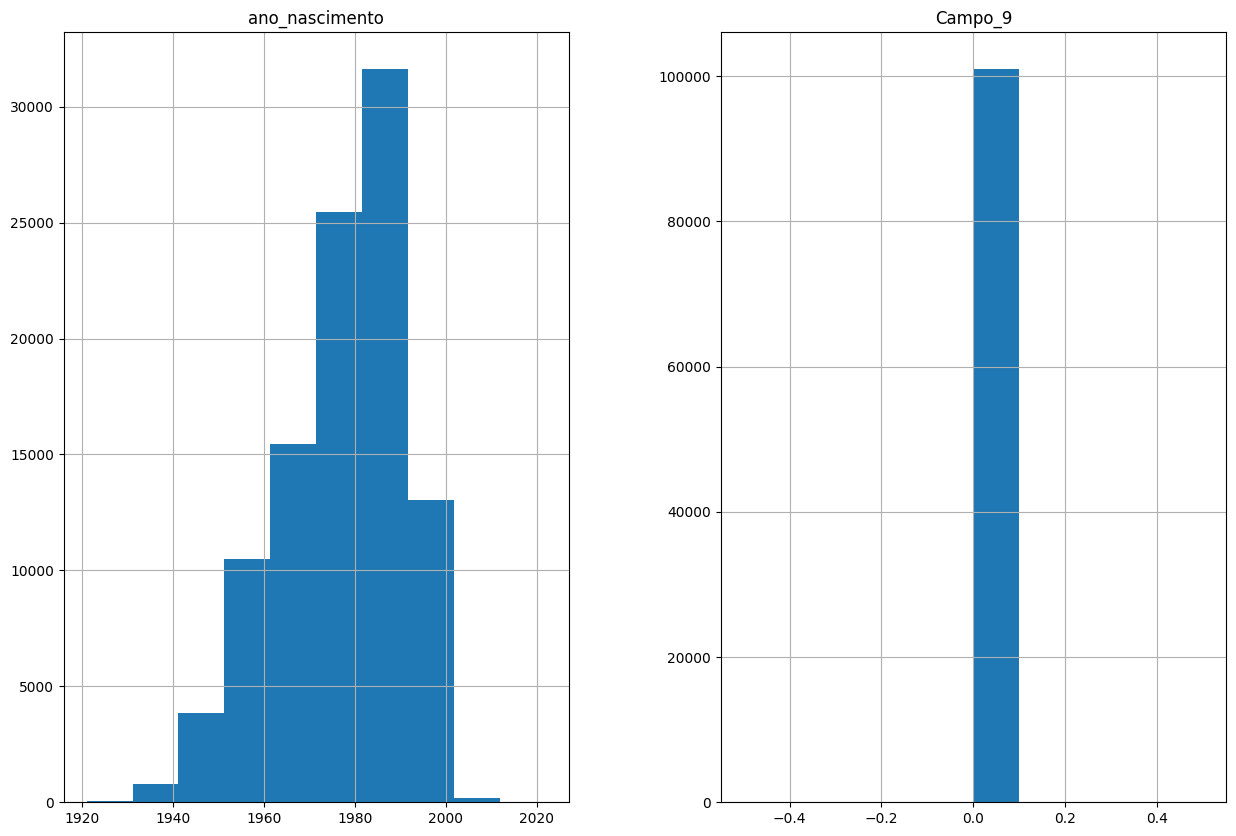

In [ ]:
# gerar um histograma pra mostrar que a media de idade de segurados que aderem a seguradora digital é menor em relação a seguradora tradicional e que o foco de vendas deve ser direcionado de acordo com a idade para ofercimento de pacotes e serviços
# observe que a quantidade de clientes está mais concentrada entre as pessoas nascidas entre os anos 1980 a 2000 que é onde a area de vendas deveria focar os esforços para a seguradora digital
df_dig.hist(figsize =(15,10))
plt.show()

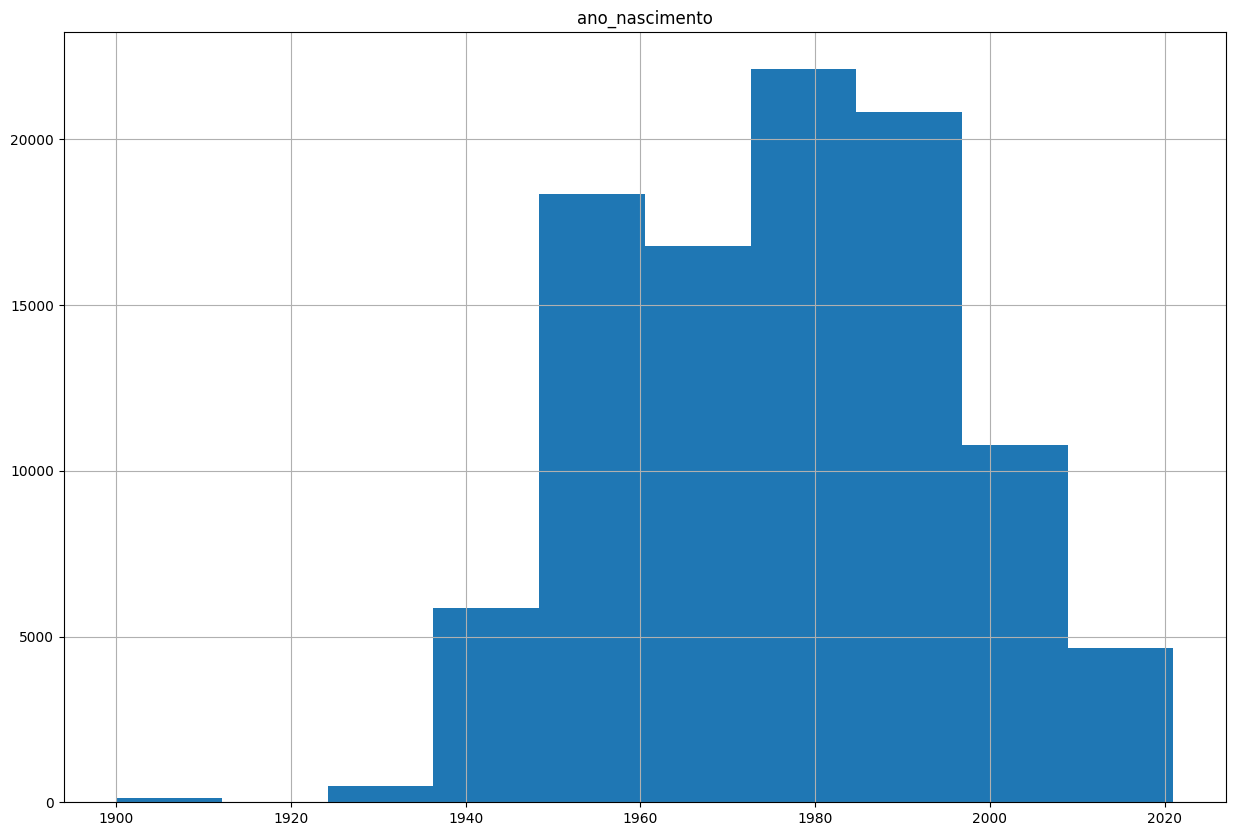

In [ ]:
# gerar um histograma pra mostrar que a media de idade de segurados que aderem a seguradora digital é menor em relação a seguradora tradicional e que o foco de vendas deve ser direcionado de acordo com a idade para ofercimento de pacotes e serviços
# observe que a quantidade de clientes está mais concentrada entre as pessoas nascidas entre os anos 1960 a 1990 que é onde a area de vendas deveria focar os esforços para a seguradora digital
df_trad.hist(figsize =(15,10))
plt.show()

Esse trabalho foi realizado para evidenciar que o comercial do grupo estudado deve focar as vendas principalmente da seguradora digital para os mais jovens que a tendencia é que a procura seja maior nessa idade, com tecnicas de venda, produtos elaborados pra pessoas mais jovens, maior facilidade na compra e pagamento e etc. 
E direcionar as vendas da seguradora tradicional para as pessoas com mais idade.
